# **INTRODUCTION & DATA PROFILE**

Hello there, I'll do some tweakings and mining on this data. Basically it's a dataset about students' alcohol consumption taken on two high schools in Portugal. The insights taken from this data might not depict the overall culture in Portugal, as the sample is very small and localized, but I believe interesting insights still dwell here nevertheless.

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualize
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

student-mat.csv
student-merge.R
student-por.csv



In [3]:
data = pd.read_csv('input/student-mat.csv')

# **Pre-processing**



In [4]:
#looking for nulls
data.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

As it seems that the data has no nulls, I will proceed without doing anything. The search of outliers will be done along the analysis.

**About The Schools **

**Escola Secundária Gabriel Pereira** (We'll call it GP)

In english, you roughly guess that it's a secondary school (We'll see later whether it's a middle school or high school). It's a school located on Évora, one of the tourist cities in Portugal, as it is also one of the UNESCO's world heritage, as it hosts   various historic monuments and the "old-time" architecture is very well preserved throughout the city. It has a population of 56,596 and 1307.08 km². An interesting fact about the school, it actually has a short profile hosted in OECD's education site, which says that it has some exemplary profiles as a school (source : http://edfacilitiesinvestment-db.org/facilities/37)
Within all my limitations, I can say that this is an exemplary school located in a prosper city.

**Escola Secundária Mouzinho da Silveira** (We'll call it MS)

It is also a secondary school, which is located on the of Portalegre, a city 447.14 square kilometres wide near the borders of Portugal and Spanish with 24,930 people living in it. I can't find any specific information regarding the school in english, so I can't provide as much info as I did with GP (Gabriel Pereira).

These informations might just pass as trivias, but I think it's pretty important to gather informations about the schools we're going to analyze, as it might very well provide a good insight on the reason for the student's behavior

In [5]:
#Data of students from MS 
studentsMS = data[data['school'] == 'MS']
print("Number of students of MS who took the test: ", studentsMS.shape[0])

#Data of students from DP 
studentsDP = data[data['school'] == 'GP']
print("Number of students of DP who took the test: ", studentsDP.shape[0])


Number of students of MS who took the test:  46
Number of students of DP who took the test:  349


It seems that the students of MS who did the survey was way less than that of GP. Because of that I will be doing analysis separately for both schools.

 **Analysis of Students' Data**
 
 So the first question would probably be the topic of the dataset itself;
 **Just how much student consumes alcohol from each school?**

Mean Dalc of MS:  1.7608695652173914
1    27
2     8
3     7
4     3
5     1
Name: Dalc, dtype: int64


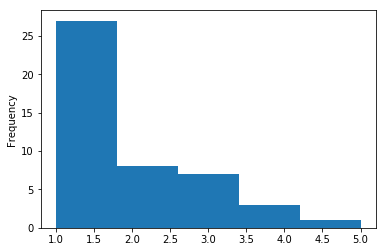

In [6]:
print("Mean Dalc of MS: ", studentsMS['Dalc'].mean())
print(studentsMS['Dalc'].value_counts())
studentsMS['Dalc'].plot.hist(bins=5)

Mean Dalc of MS:  2.5217391304347827
3    16
2    12
1    10
4     6
5     2
Name: Walc, dtype: int64


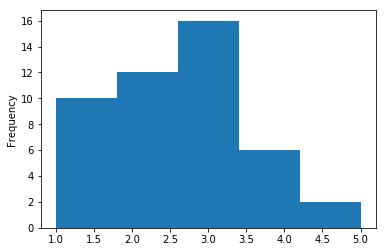

In [7]:
print("Mean Dalc of MS: ", studentsMS['Walc'].mean())
print(studentsMS['Walc'].value_counts())
studentsMS['Walc'].plot.hist(bins=5)

Mean Dalc of DP:  1.4441260744985673
1    249
2     67
3     19
5      8
4      6
Name: Dalc, dtype: int64


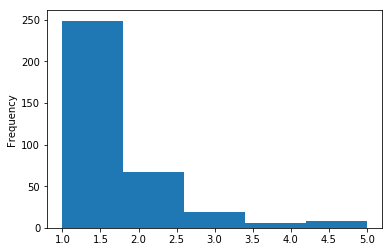

In [8]:
print("Mean Dalc of DP: ", studentsDP['Dalc'].mean())
print(studentsDP['Dalc'].value_counts())
studentsDP['Dalc'].plot.hist(bins=5)

Mean Dalc of DP:  2.5217391304347827
1    141
2     73
3     64
4     45
5     26
Name: Walc, dtype: int64


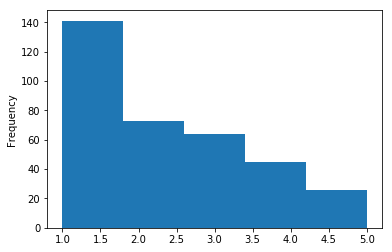

In [9]:
print("Mean Dalc of DP: ", studentsMS['Walc'].mean())
print(studentsDP['Walc'].value_counts())
studentsDP['Walc'].plot.hist(bins=5)

Looking at the results,it seems that nobody in either school has not consumed alcohol before, or maybe it is not possible to answer in the survey that you've never drunk alcohol 

# How does alcohol consumption affect students?

We'll do some questioning on the data, mostly to see how alcohol consumption affects many of student's life, not only grades. We'll divide the students from each schools into 3 groups: Low alcohol consumption(average consumption of 1), moderate alcohol consumption(average consumption of 2-3), and high alcohol consumption(average consumption of 4-5)

**Question 1: How much difference is there at students' alcohol consumption on weekdays and weekends?**

In [10]:
#difference of alcohol consumption on weekdays and weekends:
#on MS students:
print("MS Students: \n",(studentsMS['Dalc'] - studentsMS['Walc']).value_counts())
#on DP students:
print("DP Students: \n",(studentsDP['Dalc'] - studentsDP['Walc']).value_counts())

MS Students: 
 -1    18
 0    17
-2     7
-3     2
 1     1
 2     1
dtype: int64
DP Students: 
  0    171
-1     91
-2     63
-3     18
-4      4
 1      2
dtype: int64


We can see different results for the two schools:
1. Most of MS students consume a lot more on weekends than they did on weekdays(~40% ). The number who did that is almost the same as those whose consumption stays the same both on weekdays and weekends(~36%)
2. Most of DP students' consumption is equal on weekdays and weekends(~I think it's those type who have low consumption either way, we'll see later on). Around 26% consume one point more alcohol on weekends than on weekdays.

In [11]:
print(data.shape)
data.head(10)

(395, 33)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


**Question 2: does alcohol consumption has any correlations on family relationships?**

Family relationships are self-answered by the students, so it might only reflect the student's own feelings on his/her family relationships, not the actual reality. Though, I don't think we need to consider any biases or any incentives to lie here. 

The variable 'Famrel' is a 1..5 scale depicting the student's view of their own family relationships. 1 is very bad, and 5 is very good. For analysis, we'll first group the students according to their total alcohol consumption every week (weekdays consumption + weekend consumption). Then we'll see how does each group see their own family relations.

We'll also do the reverse, splitting based on family relations, then seeing how each category is on alcohol consumption frequency.

In [12]:
#create an attribute depicting total alcohol consumption
studentsMS['TotalCons'] = studentsMS['Dalc'] + studentsMS['Walc']
#print(studentsMS['TotalCons'].value_counts())

studentsDP['TotalCons'] = studentsDP['Dalc'] + studentsDP['Walc']
#print(studentsDP['TotalCons'].value_counts())

#Group the students based on alcohol consumption frequency
#Group1 = Low consumption; TotalCons = [1..3]
#Group2 = Moderate consumption; TotalCons = [4..7]
#Group1 = High consumption; TotalCons = [8..10]
studentsDPLow = studentsDP.loc[(studentsDP['TotalCons'] >= 1) & (studentsDP['TotalCons'] <= 3),:]
studentsMSLow = studentsMS.loc[(studentsMS['TotalCons'] >= 1) & (studentsMS['TotalCons'] <= 3),:]

studentsDPMod = studentsDP.loc[(studentsDP['TotalCons'] >= 4) & (studentsDP['TotalCons'] <= 6),:]
studentsMSMod = studentsMS.loc[(studentsMS['TotalCons'] >= 4) & (studentsMS['TotalCons'] <= 7),:]

studentsDPHigh = studentsDP.loc[(studentsDP['TotalCons'] >= 7) & (studentsDP['TotalCons'] <= 10),:]
studentsMSHigh = studentsMS.loc[(studentsMS['TotalCons'] >= 8) & (studentsMS['TotalCons'] <= 10),:]


/home/ardyh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/ardyh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


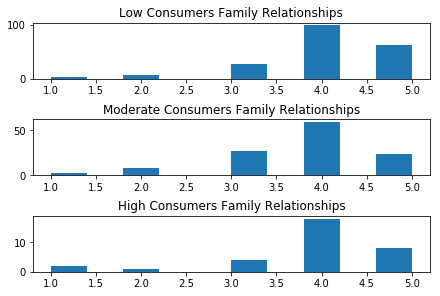

Average Famrel for Low Group 4.081218274111675
Average Famrel for Mod Group 3.7815126050420167
Average Famrel for High Group 3.878787878787879


In [13]:
#Showing the distribution of answers on family relationship variable
fig, axs = plt.subplots(3,1, constrained_layout=True)
axs[0].hist(studentsDPLow['famrel'])
axs[0].set_title('Low Consumers Family Relationships')

axs[1].hist(studentsDPMod['famrel'])
axs[1].set_title('Moderate Consumers Family Relationships')

axs[2].hist(studentsDPHigh['famrel'])
axs[2].set_title('High Consumers Family Relationships')
plt.show()

print("Average Famrel for Low Group", studentsDPLow['famrel'].mean())
print("Average Famrel for Mod Group", studentsDPMod['famrel'].mean())
print("Average Famrel for High Group", studentsDPHigh['famrel'].mean())

There seems to be no difference on students' perception on family relationship, though the students who consume less alcohol seems to be the group with the highest perceived level of family relationship.

**Question 3: How does alcohol consumption correlate with parents' occupation?**

In [14]:
tempHigh = pd.DataFrame(data=studentsDPHigh['Fjob'].value_counts())
tempHigh['FPercent'] = tempHigh['Fjob']/(tempHigh['Fjob'].sum())
tempHigh['Mjob'] = studentsDPHigh['Mjob'].value_counts()
tempHigh['MPercent'] = tempHigh['Mjob']/(tempHigh['Mjob'].sum())

print("High Group: \n\n", tempHigh)

tempMod = pd.DataFrame(data=studentsDPMod['Fjob'].value_counts())
tempMod['FPercent'] = tempMod['Fjob']/(tempMod['Fjob'].sum())
tempMod['Mjob'] = studentsDPMod['Mjob'].value_counts()
tempMod['MPercent'] = tempMod['Mjob']/(tempMod['Mjob'].sum())

print("\nMod Group: \n\n", tempMod)

tempLow = pd.DataFrame(data=studentsDPLow['Fjob'].value_counts())
tempLow['FPercent'] = tempLow['Fjob']/(tempLow['Fjob'].sum())
tempLow['Mjob'] = studentsDPLow['Mjob'].value_counts()
tempLow['MPercent'] = tempLow['Mjob']/(tempLow['Mjob'].sum())

print("\nLow Group: \n\n", tempLow)

High Group: 

           Fjob  FPercent  Mjob  MPercent
services    15  0.454545     9  0.321429
other       14  0.424242    10  0.357143
teacher      2  0.060606     7  0.250000
health       2  0.060606     2  0.071429

Mod Group: 

           Fjob  FPercent  Mjob  MPercent
other       73  0.613445    41  0.344538
services    34  0.285714    33  0.277311
teacher      6  0.050420    17  0.142857
at_home      4  0.033613    14  0.117647
health       2  0.016807    14  0.117647

Low Group: 

           Fjob  FPercent  Mjob  MPercent
other      109  0.553299    71  0.360406
services    43  0.218274    52  0.263959
teacher     19  0.096447    28  0.142132
health      14  0.071066    16  0.081218
at_home     12  0.060914    30  0.152284


Originally, I would like to see whether students' alcohol consumption is highly correlated with parents' job, as it would influence the family economy and can predict how much alcohol students can buy, but it seems like the answer is not really representative, as there are only 5 groups of job. 

Though, as it stands, the distribution of jobs on low consumers and moderate consumers are pretty much the same. Only on high consumers the distribution is a bit skewed, as parents on services are almost on equal numbers as those on "other" jobs.

**Question 4: Does more alcohol consumption correlate with higher failure?**

The variable failure in the data stands for class failures, which is a number in the range [1..4]

In [20]:
#Selecting students whose failure are greater than tree, then see their weekly alcohol consumption 
studentsDP.loc[studentsDP['failures'] >= 3, 'TotalCons'].value_counts()

2     5
6     3
7     2
10    1
5     1
4     1
3     1
Name: TotalCons, dtype: int64

Here, we can actually see that most of the students who fail a lot actually do consume a lot of alcohol over the week (6-10 times), although there are also many of them who are low on alcohol consumption (5)

So far these are the only questions I asked to the dataset, if you have any critics or any interesting ideas to ask to the dataset, please straightly contact me. Good day!